# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Filiz Günal - 431174
    
    2. Jana Maria Hauer -  399331
    
    3. Lars Quakulinski - 406565

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.model_selection
import p_decision_tree
import sklearn as sk

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes.

In [6]:
# Your answer goes here
data_set = pd.read_csv("AirBnB_original.csv")
data_set.head()

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1


### Basic Cleaning

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove?

In [7]:
# Your answer goes here
clean_data = data_set.dropna()
print(data_set.shape[0] - clean_data.shape[0] , "rows removed")

1477 rows removed


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed?

In [8]:
# Your answer goes here
data = clean_data.drop_duplicates(subset=['id'])
print(clean_data.shape[0] - data.shape[0] , "rows removed")

389 rows removed


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation.

In [2]:
# Your answer goes here
data_cleaned = pd.read_csv("AirBnB_cleaned.csv")
print("Average Price:", data_cleaned.price.mean())
print("First Percentile:", data_cleaned.price.quantile(.25))
print("Third Percentile:", data_cleaned.price.quantile(.75))
print("Standard Deviation:", data_cleaned.price.std())

Average Price: 625.4636797380085
First Percentile: 340.0
Third Percentile: 913.0
Standard Deviation: 331.23624102553555


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset.

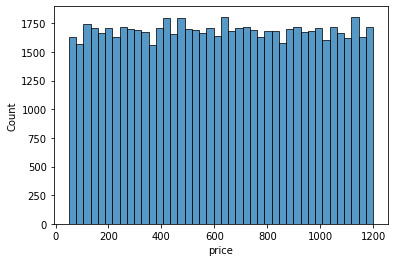

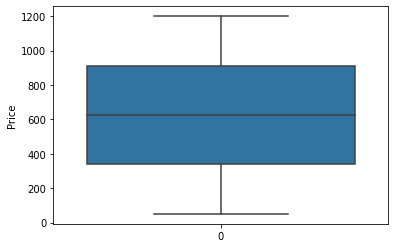

In [8]:
# Your answer goes here
sns.histplot(data=data_cleaned.price)
plt.show()
bplot = sns.boxplot(data=data_cleaned.price)
bplot.set(ylabel="Price")
plt.show()

### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment

In [11]:
# Your answer goes here


_Answer:_ 
- id & host id: Identifiers give no further information on the datapoint since they are only used for unique identification
- neighborhood group & neighborhood: both give information about the location in the city. The quality of the surrounding area of an           appartement is a big factor in pricing them
- lat & long: These two factors are very specific and if used only could be as a pair. Since the approximate location of the appartement is   already discussed with the neighborhood it is in I would discard this feature
- country & country code are not relevant since they are the same for all appartments that will be concidered
- instant bookable: There is no direct causality between the price and the bookability. Hence, it can probabiliy be omitted.
- cancellation policy: Often apartments with more flexible cancellation policy have a higher price.
- room type: An entire apartment will have a higher price than only a room. Hence, it is relevant for the price.
- construction year: Newer apartments could have a higher price than older buildings.
- price: Of course the price of other apartments is relevant for pricing the own apartment.
- service fee: The service fee might correlate with other features, e.g the price or number of rooms, but it is not of interest alone.
- minimum nights: There could be offers where an apartment has a lower price per night but a higher minimum nights amount. Hence, it could be relevant
- number of reviews: Since the number of reviews is very dependent on the time the apartment has been listed it should not correlate with the price 
- review rate number: A large number of reviews can apply to apartments with a higher price as well as apartments with a lower price. Hence it is not relevant. 
- calculated host listings count: The number of listings per host does not speek for the price of the listings
- number rooms: It can be expected that apartments with more rooms will have a higher price


### Univariate Analysis

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision?

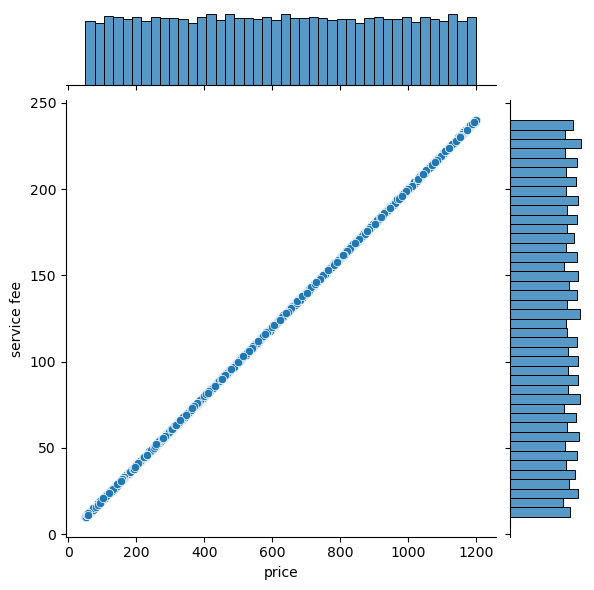

In [12]:
# Your answer goes here
sns.jointplot(x=data_cleaned['price'], y=data_cleaned['service fee']) 
plt.show()

_Answer:_

The relationship between price and service fee is very linear. Without any outliers. This relationship is not helpful for finding a good price for our apartement but if we need to decide on a appropriate service fee it could be concidered using a similar pricing.

Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation.

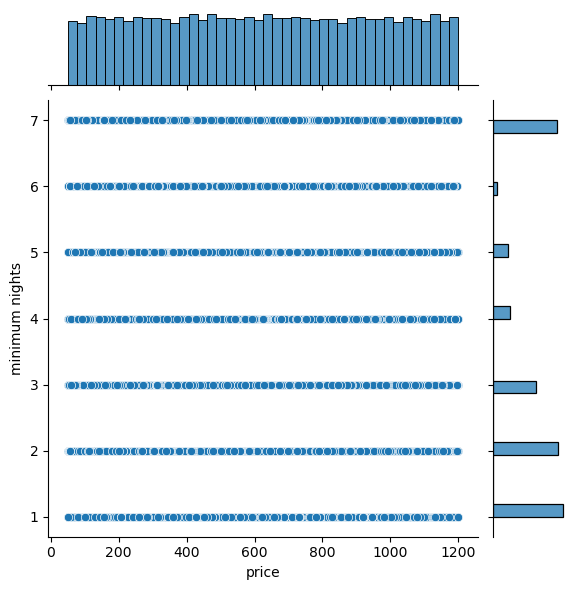

In [13]:
# Your answer goes here
sns.jointplot(x=data_cleaned['price'], y=data_cleaned['minimum nights']) 
plt.show()

_Answer:_
It is visible that most guest either stay for 1 to three nights (maybe for a weekend trip?) or for a whole week. This behavior is can be found for listings of all prices as seen by the horizontal regression line. 


To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price?

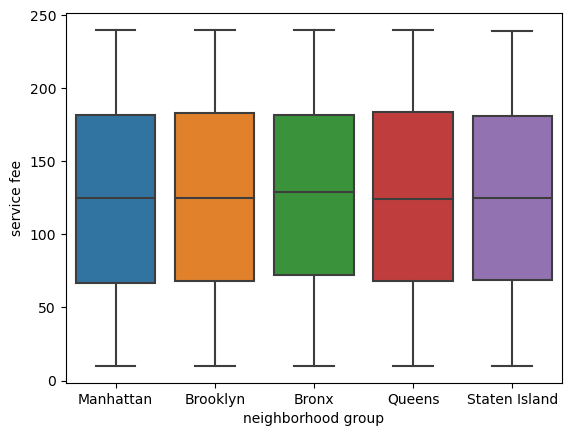

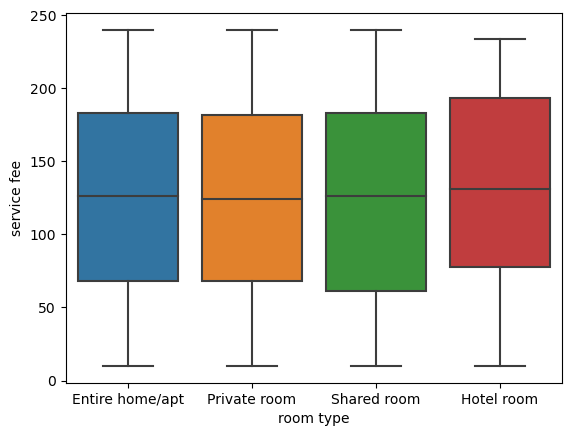

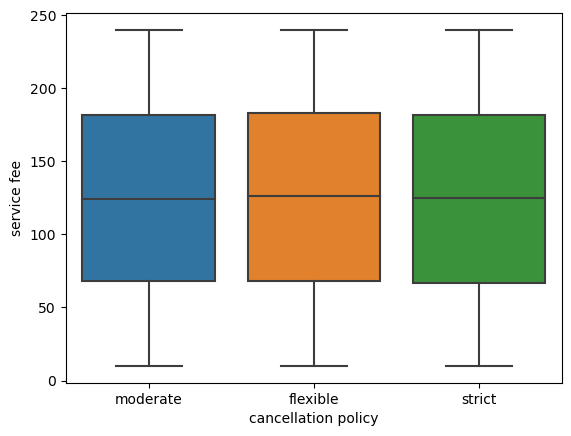

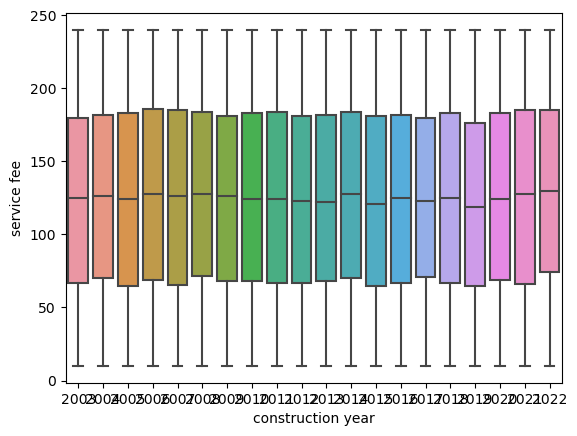

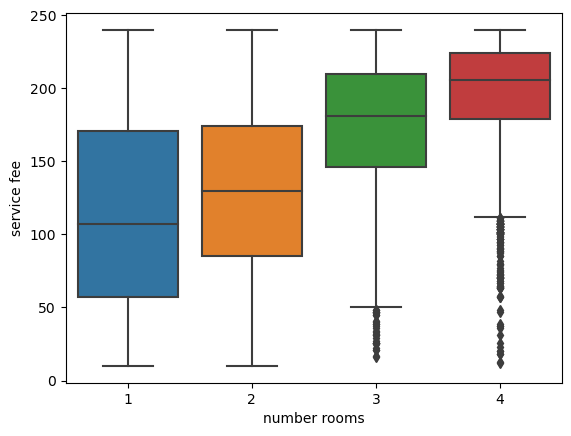

In [14]:
# Your answer goes here
sns.boxplot(x=data_cleaned['neighborhood group'], y=data_cleaned['service fee']) 
plt.show()
sns.boxplot(x=data_cleaned['room type'], y=data_cleaned['service fee']) 
plt.show()
sns.boxplot(x=data_cleaned['cancellation policy'], y=data_cleaned['service fee']) 
plt.show()
sns.boxplot(x=data_cleaned['construction year'], y=data_cleaned['service fee']) 
plt.show()
sns.boxplot(x=data_cleaned['number rooms'], y=data_cleaned['service fee']) 
plt.show()

_Answer:_
It is visible that except the number of rooms none of the features have a real influence on the price. The only other thing that is noticable is that most hotel rooms start at a higer price than the other room types.


### Multivariate Analysis

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision. 

#### Multivariate Analysis for Neighborhood Group 

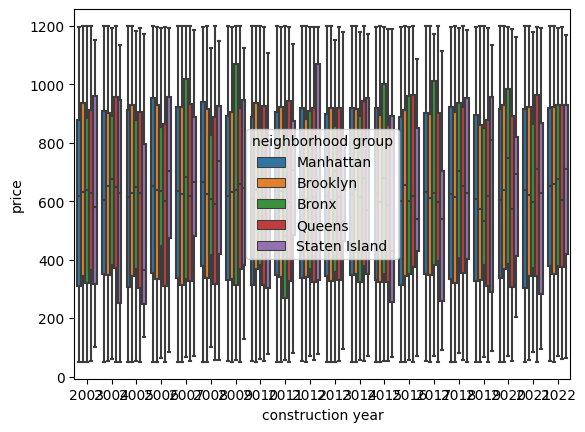

In [485]:
d1 = sns.boxplot(x = data['construction year'],
            y = data['price'],
            hue = data['neighborhood group'])

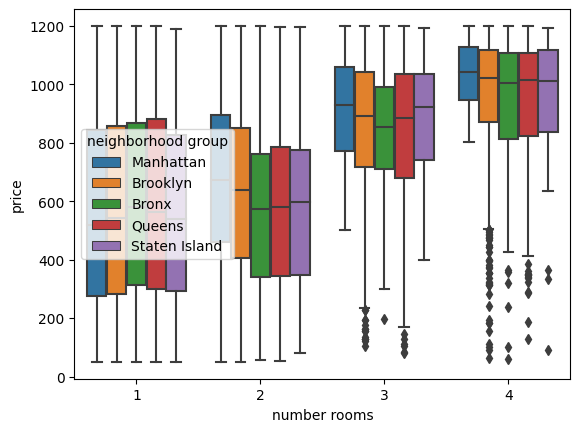

In [486]:
d1 = sns.boxplot(x = data['number rooms'],
            y = data['price'],
             hue = data['neighborhood group'])

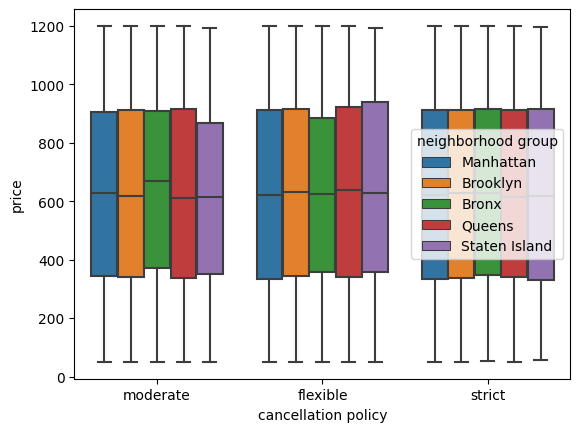

In [487]:
d1 = sns.boxplot(x = data['cancellation policy'],
y = data['price'],
hue = data['neighborhood group'])

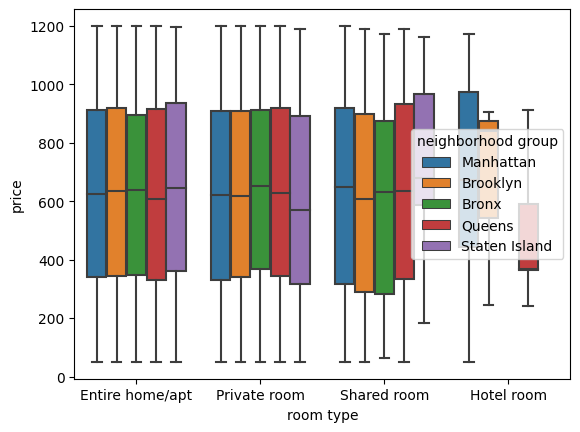

In [488]:
d1 = sns.boxplot(x = data['room type'],
            y = data['price'],
            hue = data['neighborhood group'])

_Answer:_
For apartments with more then one room, apartments in Manhatten and Brooklyn tend to have a slighter higher price.
There is no correlation between the other pairs.


#### Multivariate Analysis for Room Type

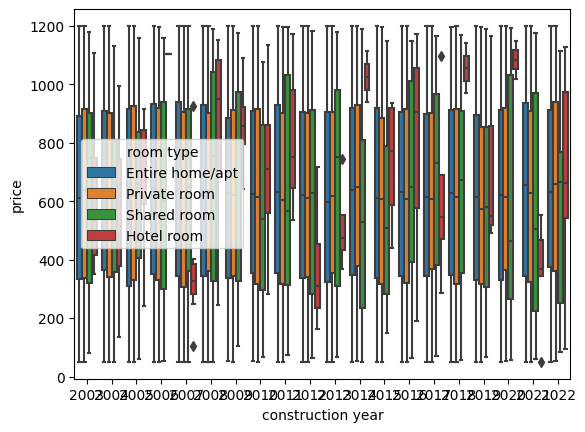

In [489]:
d1 = sns.boxplot(x = data['construction year'],
            y = data['price'],
            hue = data['room type'])

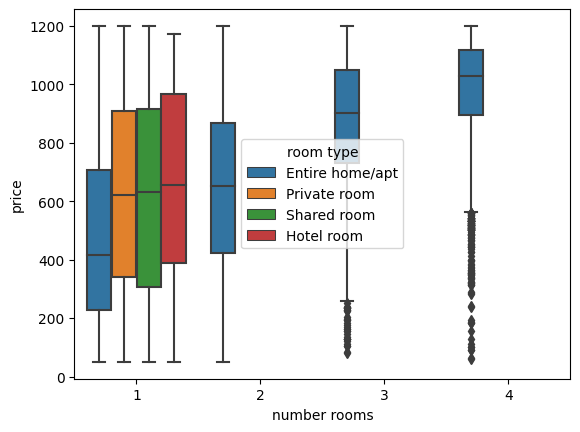

In [490]:
d1 = sns.boxplot(x = data['number rooms'],
            y = data['price'],
             hue = data['room type'])

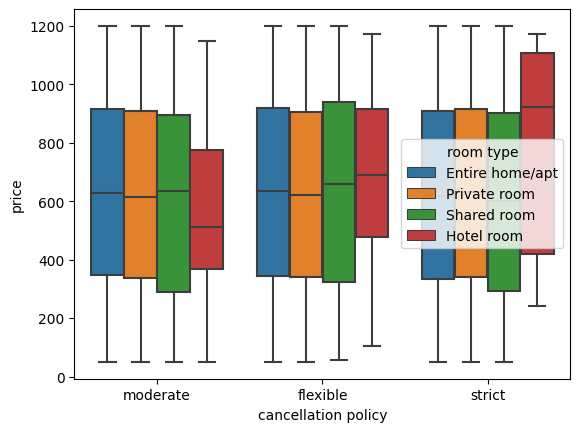

In [491]:
d1 = sns.boxplot(x = data['cancellation policy'],
        y = data['price'],
        hue = data['room type'])

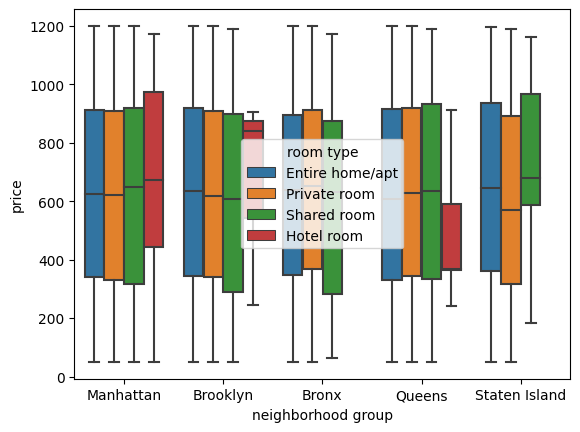

In [492]:
d1 = sns.boxplot(x = data['neighborhood group'],
            y = data['price'],
            hue = data['room type'])

_Answer:_
Private, shared and hotel rooms only have one room.
The price for hotel rooms fluctuates highly for different construction years. However, there might not be a causality. Hotel rooms in Queens have a lower price, compared to other neighborhood groups.
Hotel rooms with a strict cancellation policy tend to have a higher price.

#### Multivariate Analysis for Number of Rooms

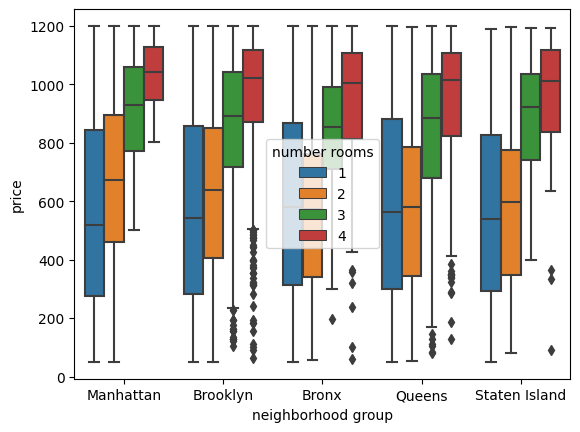

In [493]:
d1 = sns.boxplot(x = data['neighborhood group'],y = data['price'], hue = data['number rooms'])

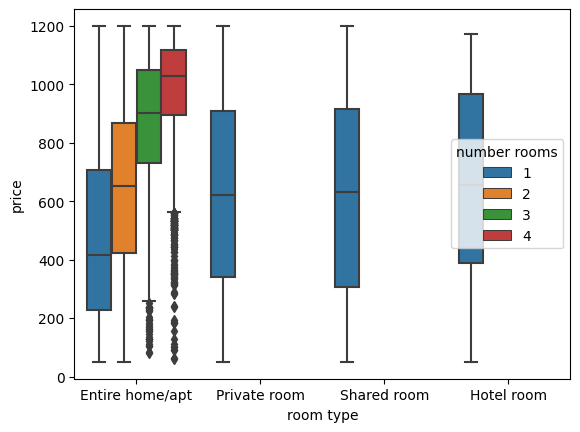

In [494]:
d1 = sns.boxplot(x = data['room type'],y = data['price'], hue = data['number rooms'])

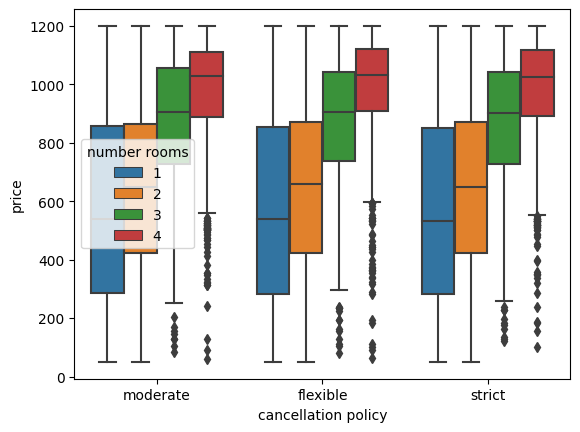

In [495]:
d1 = sns.boxplot(x = data['cancellation policy'],y = data['price'], hue = data['number rooms'])

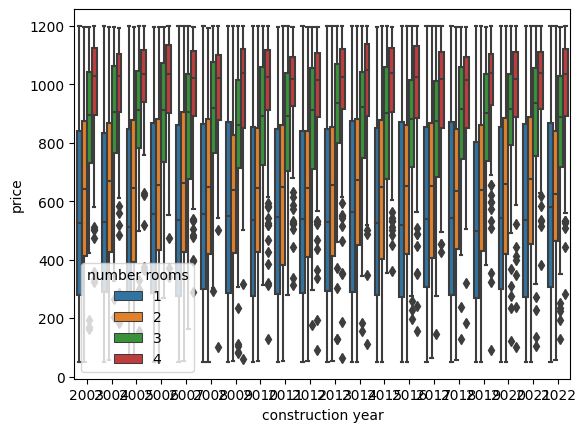

In [496]:
d1 = sns.boxplot(x = data['construction year'],y = data['price'], hue = data['number rooms'])

_Answer:_
As stated before, multiple rooms are only availabe for entire apartments.
More rooms result in a higher price, the other features do not have a large impact.


#### Multivariate Analysis for Construction Year

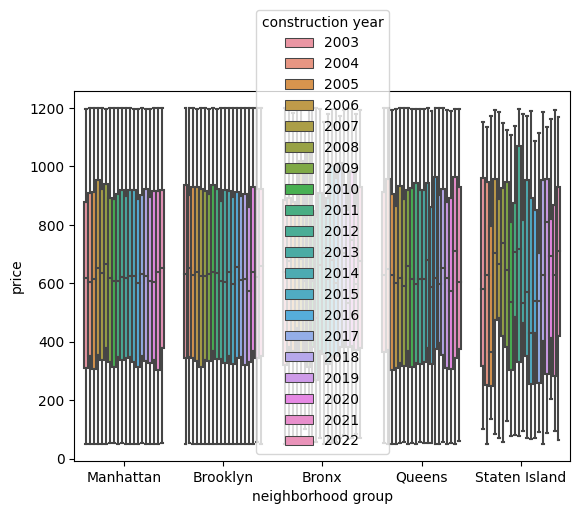

In [497]:
d1 = sns.boxplot(x = data['neighborhood group'],y = data['price'], hue = data['construction year'])

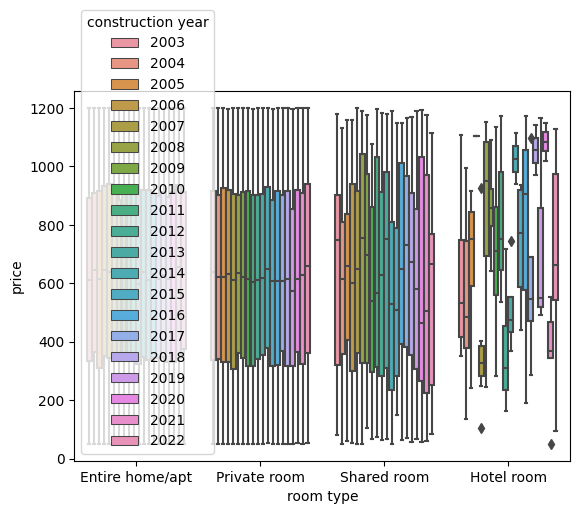

In [498]:
d1 = sns.boxplot(x = data['room type'],y = data['price'], hue = data['construction year'])

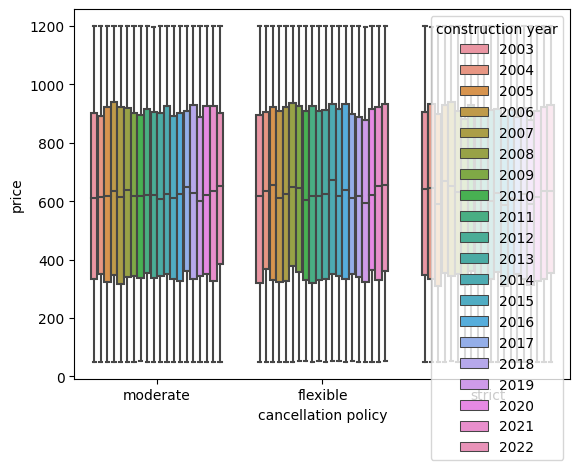

In [499]:
d1 = sns.boxplot(x = data['cancellation policy'],y = data['price'], hue = data['construction year'])

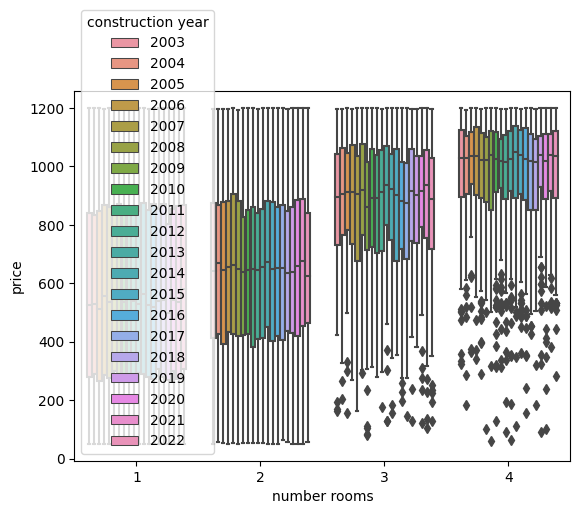

In [500]:
d1 = sns.boxplot(x = data['number rooms'],y = data['price'], hue = data['construction year'])

_Answer:_
The construction year does not have a large impact on the price. However, for hotel rooms, the price highly fluctuates.


### Selection of Variables (1 point)

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_ The number of rooms has a high impact on the price, as well as the neighborhood group. Therefore, we would choose this pair of features for the pricing.


## Question 2: Setting the Price (45 points)

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline (5 points)

First, you want to set a baseline to compare against. You use the mean absolute error as metric. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [501]:
randomState = 100

In [502]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def baselineRec(data):
    avg = data['price'].mean()
    return avg

def baselineErr(data):
    
    pred = baselineRec(data)
    
    abs_err = 0

    for i in range(len(test['price'])):
        abs_err += abs(int(test['price'].iloc[i]) - pred)
    
    abs_err = abs_err/len(test['price'])
    
    return abs_err
    

train, test = train_test_split(data, test_size=0.05, random_state= randomState)

print(baselineErr(test), '$ is the mean absolute error of the test set if we use the average of all prices as a recommended price.')

mean =  baselineRec(test)

#print(mean_absolute_error(list(test['price']),[mean for i in range(len(test['price']))]))

284.56738577832016 $ is the mean absolute error of the test set if we use the average of all prices as a recommended price.


## Decision Tree (15 points)

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600]. **(2 points)**

In [503]:
data['Price_Bins'] = pd.cut(data['price'].astype(int),[50, 200, 400, 600, 800, 1000, 1200], right=True, include_lowest=True)

Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before. **(0.5 point)**

In [504]:
train, test = train_test_split(data, test_size=0.05, random_state= randomState)

columns = train.columns


descriptive_features = columns[[2,10,18]]
#The last column is considered as label
label = columns[-1]

print(label)

#Converting all the columns to string
for column in columns:
    data[column]= data[column].astype(str)

data_descriptive = data[descriptive_features].values
data_label = data[label].values

print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)


Price_Bins
descriptive features:
Index(['neighborhood group', 'room type', 'number rooms'], dtype='object')

target feature:
Price_Bins


Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy? **(5 points)**

Note: For this task, you must use the p_decision_tree library.

System entropy:  2.5768286976479446


Error: no "view" mailcap rules found for type "application/pdf"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'output/visualTree.gv.pdf'


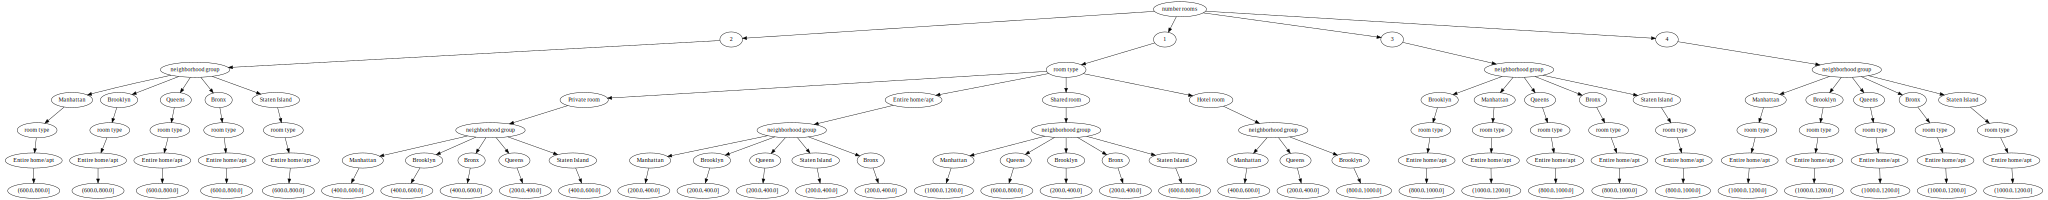

In [505]:
from p_decision_tree.DecisionTree import DecisionTree
import graphviz

decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

decisionTree.id3(0,10)

dot = decisionTree.print_visualTree(render=True )

print("System entropy: ", format(decisionTree.entropy))

display(dot)

What is the first feature the decision tree splits on? **(0.5 point)**

_Answer:_

The first feature it splits on is the number of rooms.

Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

**(1 point)**

_Answer:_
The Room in Manhattan should be priced between 400 and 600 with the mean of the bin being 500, the room on Staten Island should be priced between 600 and 800 with the mean of the bin being 700$


What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage. **(1 point)**

In [506]:
#Our apartment should be priced between 600$ and 800$ with the mean of the bin being 700$
prop_price = 700

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [507]:
import pydotplus
import networkx

def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, graph, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<2*len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above. **(2 points)**

In [508]:
import re
pred = []
for i in range(test.shape[0]):
    pred.append(re.findall(r'\d+',get_predicted_bin(test.iloc[i],features,predictor)))

avg_pred = [(int(i[0])+int(i[2]))/2 for i in pred]



You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error? **(3 points)**

In [509]:
# Your answer goes here
abs_err = 0

for i in range(len(test['price'])):
    abs_err += abs(int(test['price'].iloc[i]) - avg_pred[i])
    
abs_err = abs_err/len(test['price'])

print("The mean absolut error is", abs_err, "$")


The mean absolut error is 275.23624047417445 $


## Clustering (23 points)

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding (2 points)

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [510]:
# Your answer goes here



from sklearn.preprocessing import LabelBinarizer

#print(test)

train2 = train['number rooms'].to_frame()
oh_encoder = LabelBinarizer()
oh_encoder.fit(train['neighborhood group'])
transformed = oh_encoder.transform(train['neighborhood group'])
ngroups = pd.DataFrame(transformed)

train2['ng0'] = list(ngroups[0])
train2['ng1'] = list(ngroups[1])
train2['ng2'] = list(ngroups[2])
train2['ng3'] = list(ngroups[3])
train2['ng4'] = list(ngroups[4])

oh_encoder.fit(train['room type'])
transformed = oh_encoder.transform(train['room type'])
rtype = pd.DataFrame(transformed)

train2['rt0'] = list(rtype[0])
train2['rt1'] = list(rtype[1])
train2['rt2'] = list(rtype[2])
train2['rt3'] = list(rtype[3])



test2 = test['number rooms'].to_frame()
oh_encoder = LabelBinarizer()
oh_encoder.fit(test['neighborhood group'])
transformed = oh_encoder.transform(test['neighborhood group'])
ngroups = pd.DataFrame(transformed)

test2['ng0'] = list(ngroups[0])
test2['ng1'] = list(ngroups[1])
test2['ng2'] = list(ngroups[2])
test2['ng3'] = list(ngroups[3])
test2['ng4'] = list(ngroups[4])

oh_encoder.fit(test['room type'])
transformed = oh_encoder.transform(test['room type'])
rtype = pd.DataFrame(transformed)

test2['rt0'] = list(rtype[0])
test2['rt1'] = list(rtype[1])
test2['rt2'] = list(rtype[2])
test2['rt3'] = list(rtype[3])





### Choosing number of clusters (8 points)

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

In [511]:
from sklearn.cluster import KMeans
import math

means = []
std = []

def standartder(data, means):
    
    size = len(data['cluster'])
    
    std = 0
    
    for i in range(len(data['price'])):
        std += pow((int(data['price'].iloc[i]) - means[int(data['cluster'].iloc[i])]),2)
    
    std = math.sqrt(std/size)
    
    return std


for i in range(4,16):

    cluster_num = i
    kmeans = KMeans(n_clusters=cluster_num, n_init=10, random_state=randomState).fit(train2)
    cl_test = train2.assign(cluster = kmeans.labels_)
    #cl_test = test2.assign(cluster = kmeans.predict(test2))
    
    centroids = kmeans.cluster_centers_
    
   
  
    curMeans = []
    #for j in range(i):
    
    
    
    cl_test['price'] = list(train['price'])
   
    #cl_test['price'] = list(test['price'])
    curMeans = list(cl_test.groupby('cluster')['price'].mean())

    
    means.append(curMeans)
  
        
    std.append(standartder(cl_test, curMeans))

print(std)

[312.53313450249726, 312.42800701844874, 313.1766221071358, 311.96505826939745, 313.19830241245904, 311.9665401512181, 309.83474520748047, 308.3810841577762, 308.3833277043023, 308.0242560304119, 308.077162786545, 307.68045504534285]


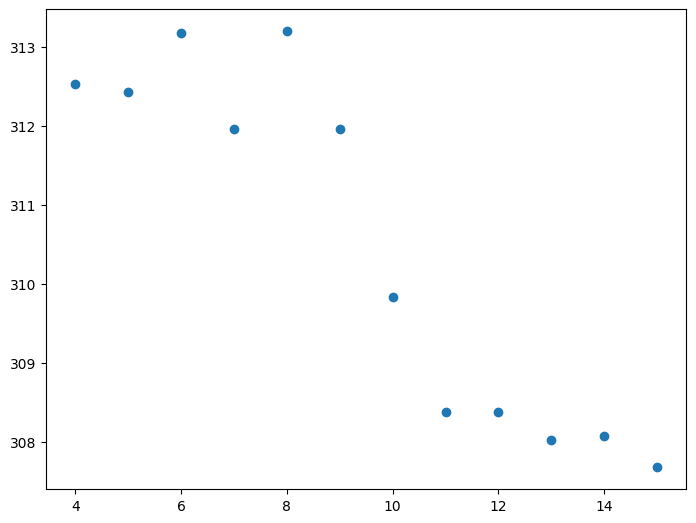

In [512]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(range(4,16),std, 'o')
plt.show()

_Answer:_

In general the standard deviation decreases with more clusters (except some fluctuations). However, only minimizing the standard deviation does not makes sense, because then, each data point will have its own cluster. 

In our opinion, using 11 clusters would be the best in this case, since after this, the standard deviation does not decrease as much as before. This corresponds to the "Elbow Criterion" for choosing the right amount of clusters.

**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment (3 points)

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [513]:
cluster_num = 9
kmeans = KMeans(n_clusters=cluster_num, n_init=10, random_state = randomState).fit(train2)

    

In [514]:
dp = train2.head(1).copy()

dp['number rooms'] = 2
dp['ng0'] = 0
dp['ng1'] = 0
dp['ng2'] = 1
dp['ng3'] = 0
dp['ng4'] = 0


dp['rt0'] = 1
dp['rt1'] = 0
dp['rt2'] = 0
dp['rt3'] = 0

pred = (kmeans.predict(dp))[0]

print('With 9 clusters our apartment should be priced at',means[5][pred])
 

With 9 clusters our apartment should be priced at 712.9656797583082


### Evaluating clustering (10 points)

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [515]:
import umap.umap_ as umap
import sklearn



#Preprocessing numerical
full_data = train[['number rooms', 'room type', 'neighborhood group']] # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

/opt/conda/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result. **(5 points)**

<AxesSubplot:>

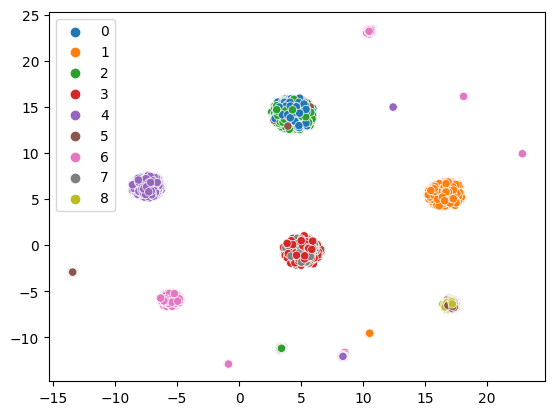

In [516]:
sns.scatterplot( x=dimension1, y=dimension2, hue=kmeans.labels_, palette="tab10")

_Answer:_

We can see that the data is, with the exception of some outliers, split into clusters.And even though there is a slight overfitting of some clusters the clustering ist mostly correct with no two big clusters being clustered together.


We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices. **(5 points)**

In [517]:

abs_err = 0


for i, row in test2.iterrows():
    
    pred = (kmeans.predict(dp))[0]

    pred_price = means[5][pred]
    
    abs_err += abs(int(test['price'][i]) - pred_price)
 
abs_err = abs_err/len(test['price'])

   
print('the mean absolute errror between the predicted and real prices is',abs_err)




the mean absolute errror between the predicted and real prices is 290.10126066206175


## Final comments on the price prediction (2 points)

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_

With around 270 and 290 dollars of mean absolute error both clustering and the decision tree are very close to the baseline. Therefore they do not provide a good way to determine the price. Especially clustering with a wore error than the baseline is not a good way to determine the price.



## Question 3: Investigating Price Elasticity (32 Points)

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice.

        id  number rooms        room type neighborhood group  price  \
0  1002102             1  Entire home/apt          Manhattan    142   
1  1002403             1     Private room          Manhattan    620   
2  1002755             2  Entire home/apt           Brooklyn    368   
3  1003689             1  Entire home/apt          Manhattan    204   
4  1004650             1     Private room           Brooklyn     71   

   utilization  
0   305.263673  
1    86.294663  
2   129.287482  
3   206.579601  
4   361.000000  


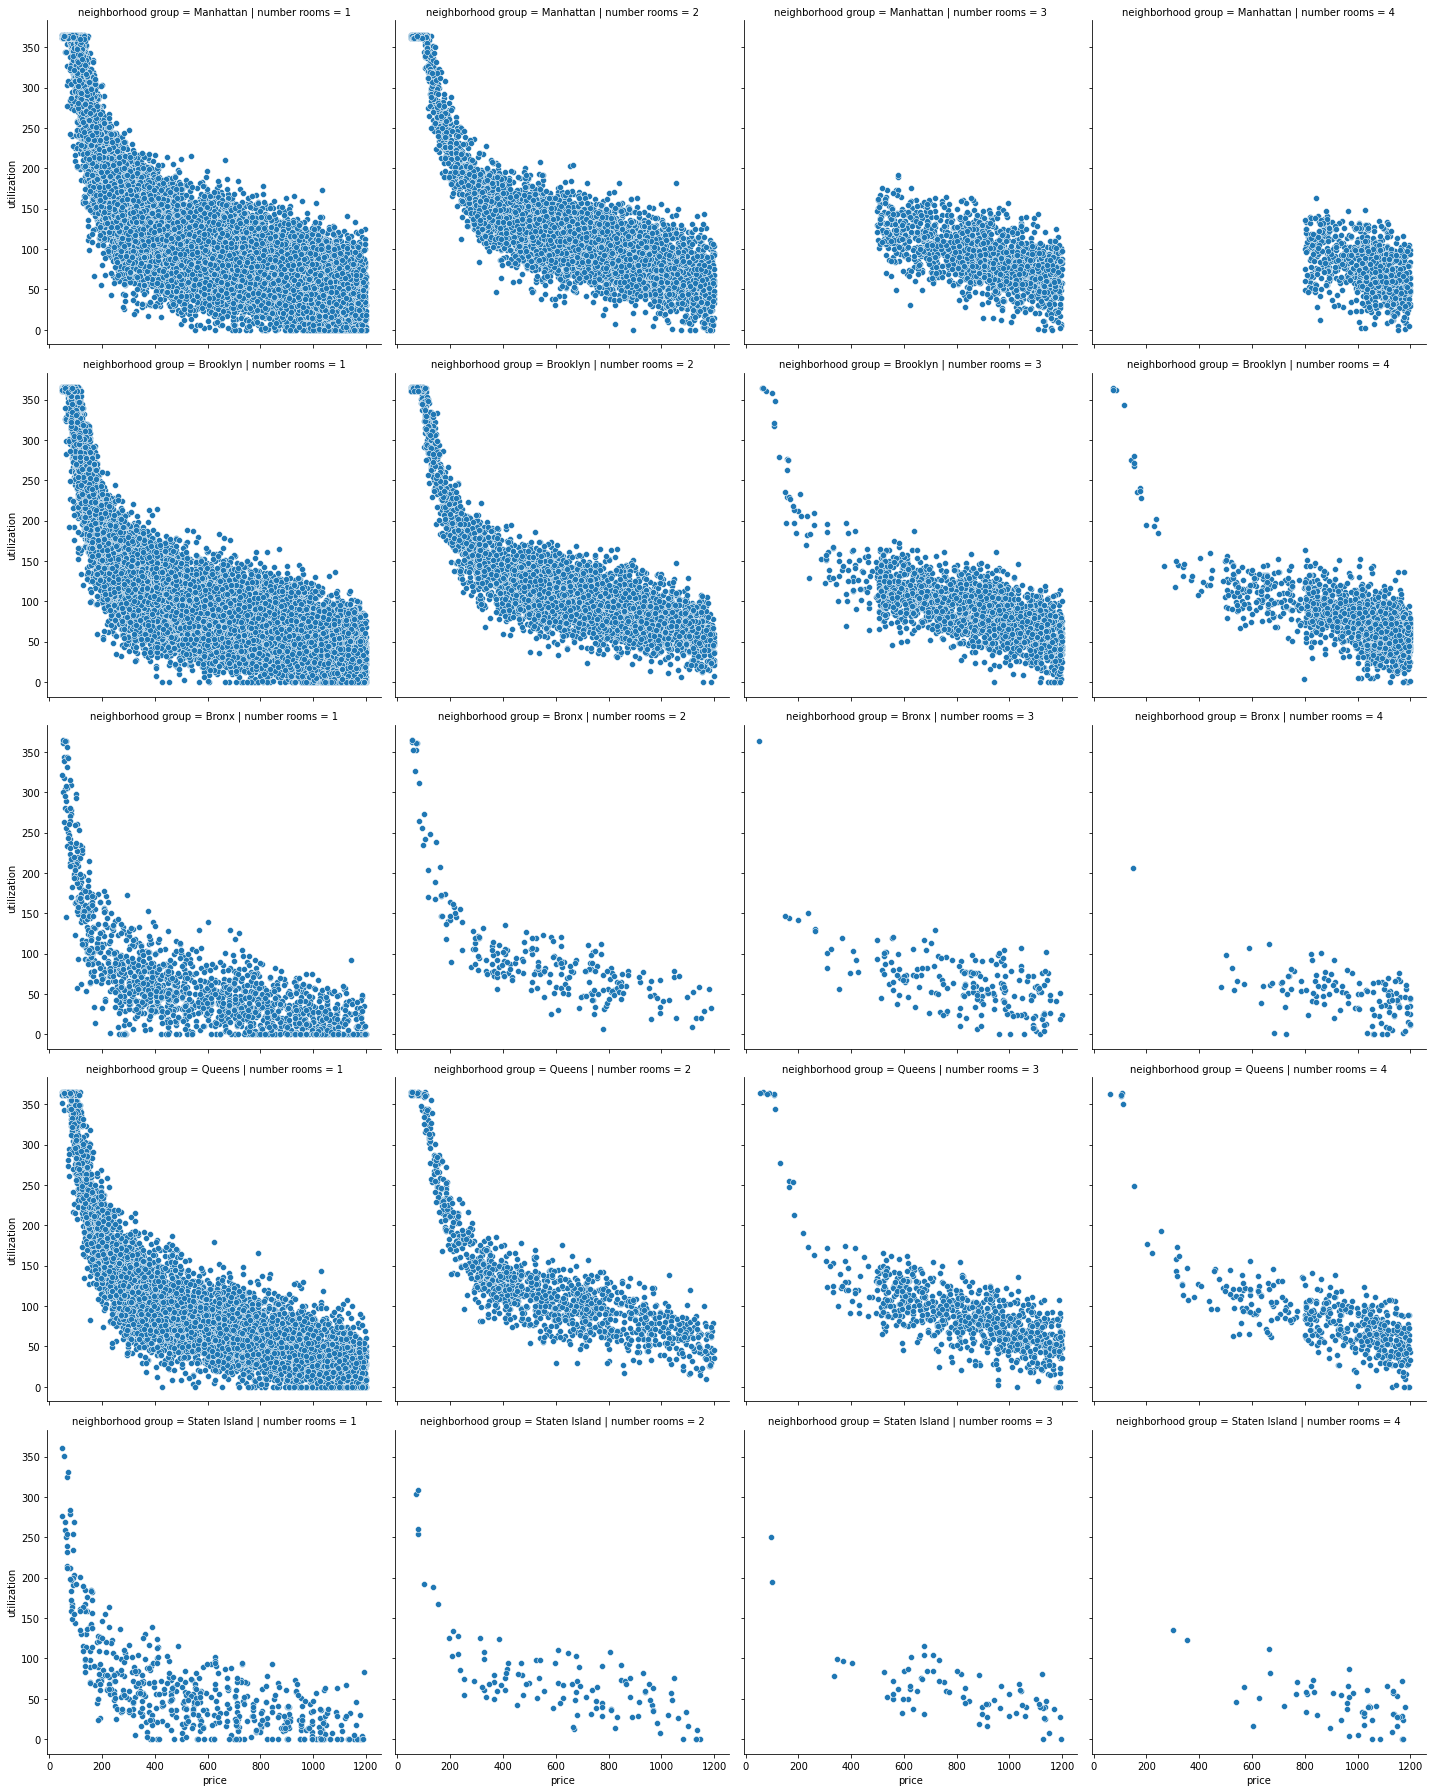

In [2]:
# Your answer goes here
df_utilization = pd.read_csv("AirBnB_utilization.csv")
print(df_utilization.head())
sns.relplot(x=df_utilization['price'], y=df_utilization['utilization'], col=df_utilization['number rooms'], row=df_utilization['neighborhood group'])

You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

Prepare the data set by splitting, one-hot encoding, and normalizing.

In [3]:
# Split dataset
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_utilization[['neighborhood group', 'room type', 'number rooms', 'price']],df_utilization['utilization'], test_size=0.05, random_state=42)


# Apply One hot encoding
encoder = sklearn.preprocessing.OneHotEncoder(sparse=False)
encoder.fit(X_train[['neighborhood group', 'room type']])
X_train_enc = encoder.transform(X_train[['neighborhood group', 'room type']])
X_test_enc = encoder.transform(X_test[['neighborhood group', 'room type']])

# Normalize
normalizer = sklearn.preprocessing.MinMaxScaler()
normalizer.fit(X_train[['number rooms', 'price']])
X_train_normalized = normalizer.transform(X_train[['number rooms', 'price']])
X_test_normalized = normalizer.transform(X_test[['number rooms', 'price']])

X_train = np.concatenate([X_train_enc, X_train_normalized], axis=1)
X_test = np.concatenate([X_test_enc, X_test_normalized], axis=1)

For each technique, use 5-cross-fold validation and assess the performance on the test set. 

#### Regression

Learn a linear regression to predict the utilization of an AirBnB.

In [4]:
# Your answer goes here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

param_grid = {
    'fit_intercept': [False,True],
    'positive': [False, True]
}
grid = GridSearchCV(LinearRegression(), param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)
grid.fit(X_train,y_train)
print(grid.best_params_)

regression_classifier = LinearRegression(fit_intercept=True, positive=False)
regression_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'fit_intercept': True, 'positive': False}


LinearRegression()

What is the mean absolute error achieved on the test data?

In [31]:
mean_absolute_error(y_test, regression_classifier.predict(X_test))
# The mean absolute error is 35.42

35.421179562722976

Show (draw!) the price elasticity for your apartment. 

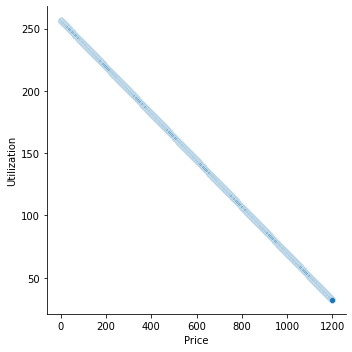

In [26]:
# Prepare df
own_apartment = pd.DataFrame([['Manhattan', 'Entire home/apt', 2]], columns=['neighborhood group', 'room type', 'number rooms'])
own_apartment = pd.concat([own_apartment]*1200, ignore_index=True)
own_apartment['price'] = list(range(1200))

# Apply OneHotEncoding
own_apartment_enc = encoder.transform(own_apartment[['neighborhood group', 'room type']])
own_apartment_normalized = normalizer.transform(own_apartment[['number rooms', 'price']])

own_apartment = np.concatenate([own_apartment_enc, own_apartment_normalized], axis=1)

regPlot = sns.relplot(x=range(1200), y=regression_classifier.predict(own_apartment))
regPlot.set(xlabel="Price", ylabel="Utilization")

#### Linear SVR

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [7]:
from sklearn.svm import LinearSVR

param_grid = {
    'C': [0.1, 1, 10, 100],
    'fit_intercept': [False, True],
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}
grid = GridSearchCV(LinearSVR(max_iter=5000), param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 10, 'fit_intercept': True, 'loss': 'epsilon_insensitive'}


c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
svr_classifier = LinearSVR(C=10, fit_intercept=True, loss='epsilon_insensitive')
svr_classifier.fit(X_train, y_train)

LinearSVR(C=10)

What is the mean absolute error achieved on the test data?

In [9]:
# Your answer goes here
mean_absolute_error(y_test, svr_classifier.predict(X_test))
# The mean absolute error is 33.1

33.10356317691577

Show (draw!) the price elasticity for your apartment. 

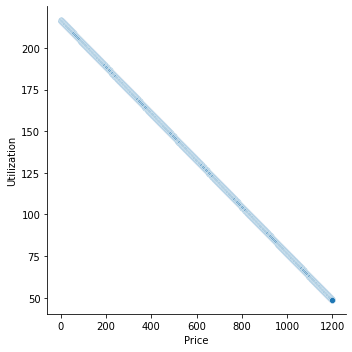

In [25]:
# Your answer goes here
linsvrPlot = sns.relplot(x=range(1200), y=svr_classifier.predict(own_apartment))
linsvrPlot.set(xlabel="Price", ylabel="Utilization")

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [12]:
# Apply Kernel
squared_train_price = np.copy(X_train)
squared_test_price = np.copy(X_test)

squared_train_price[:,-1] = squared_train_price[:,-1]**2
squared_test_price[:,-1] = squared_test_price[:,-1]**2

param_grid = {
    'fit_intercept': [False,True],
    'positive': [False, True]
}
grid = GridSearchCV(LinearRegression(), param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)
grid.fit(squared_train_price,y_train)
print(grid.best_params_)

squared_regression_classifier = LinearRegression(fit_intercept=True, positive=False)
squared_regression_classifier.fit(squared_train_price, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'fit_intercept': True, 'positive': False}


LinearRegression()

What is the mean absolute error achieved on the test data?

In [13]:
# Your answer goes here
mean_absolute_error(y_test, squared_regression_classifier.predict(squared_test_price))
# The mean absolute error is 41.14

41.14120981629851

Show (draw!) the price elasticity for your apartment. 

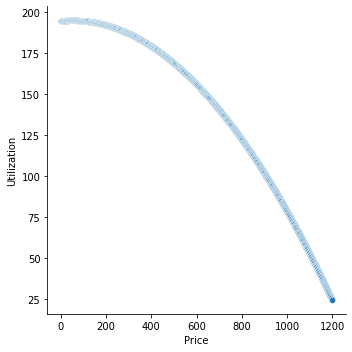

In [24]:
# Your answer goes here
squared_own_apartment = np.copy(own_apartment)
squared_own_apartment[:,-1] = squared_own_apartment[:,-1]**2
kernelRegPlot = sns.relplot(x=range(1200), y=squared_regression_classifier.predict(squared_own_apartment))
kernelRegPlot.set(xlabel="Price", ylabel="Utilization")

#### Kernels in SVR

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [6]:
# Your answer goes here
from sklearn.svm import SVR
param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2,3,4],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1, 10]
}
grid = GridSearchCV(SVR(shrinking=True), param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)
grid.fit(X_train[0:25000],y_train[0:25000])
print(grid.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'C': 10, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


In [15]:
from sklearn.svm import SVR
kernel_svr_classifier = SVR(C=10, degree=4, gamma='scale', kernel='poly')
kernel_svr_classifier.fit(X_train[0:25000], y_train[0:25000])

SVR(C=10, degree=4, kernel='poly')

What is the mean absolute error achieved on the test data?

In [16]:
# Your answer goes here
mean_absolute_error(y_test, kernel_svr_classifier.predict(X_test))
# The mean absolute error is 26.63

26.632531379804373

Show (draw!) the price elasticity for your apartment. 

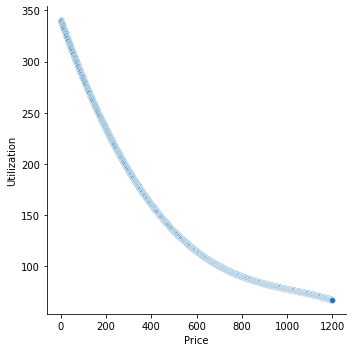

In [23]:
# Your answer goes here
kernelsvrPlot = sns.relplot(x=range(1200), y=kernel_svr_classifier.predict(own_apartment))
kernelsvrPlot.set(xlabel="Price", ylabel="Utilization")

What is your conclusion on using kernels?

_Answer:_ Kernels can provide better results. However, this is not true in every case. The quadratic kernel used for regression performed worse, compared to the linear regression. Nevertheless, using kernels in SVR yields the best results (so far).

#### Neural Network

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [11]:
from sklearn.neural_network import MLPRegressor
param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}
grid = GridSearchCV(MLPRegressor(warm_start=True), param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

{'activation': 'tanh', 'alpha': 0.0001}


c:\Users\LarsDesktop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
from sklearn.neural_network import MLPRegressor
nn_classifier = MLPRegressor(activation='tanh', alpha=0.0001, max_iter=1000)
nn_classifier.fit(X_train, y_train)

MLPRegressor(activation='tanh', max_iter=1000)

What is the mean absolute error achieved on the test data?

In [20]:
# Your answer goes here
mean_absolute_error(y_test, nn_classifier.predict(X_test))
# The mean absolute error is 18.74

18.74418676576645

Show (draw!) the price elasticity for your apartment. 

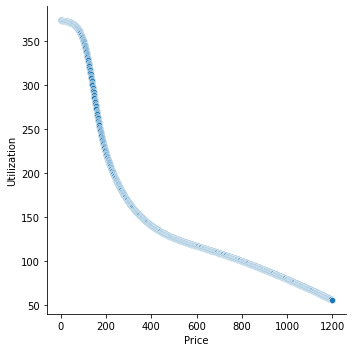

In [21]:
# Your answer goes here
nn_own_apartment = nn_classifier.predict(own_apartment)
nnPlot = sns.relplot(x=range(1200), y=nn_own_apartment)
nnPlot.set(xlabel="Price", ylabel="Utilization")

### Profit discrepencies when incorporating price elasticity

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [22]:
# Decision Tree: 700
# Clustering: 713

# The best model was the neural network
decision_tree_elasticity = nn_own_apartment[700]
clustering_elasticity = nn_own_apartment[713]
print(decision_tree_elasticity)
print(clustering_elasticity)

# Calculate yearly income
print(decision_tree_elasticity*700)
print(clustering_elasticity*713)

109.2668415751262
108.16319578783572
76486.78910258833
77120.35859672687


_Answer:_ The best model is the neural network. While the higher price (713$ from clustering) results in more income per booking, the utilization of the lower price (700$ from decision tree) is higher. That is, with a lower price, the apartment is booked more frequently.

Calculating the income of a year (no. bookings * price per booking) respects both the price per booking and utilization of the apartment. This results in a slighter better yearly income when pricing the apartment at 713$ (77120,4$ per year) compared to 700$ (76486.8$). Thus, 713$ is the better and optimal price.



# Question 4: Conclusion

Summarize your findings and discuss limitations.

_Answer:_ In this project, our aim is to price an AirBnB by using data science techniques on the given data ‘**AirBnB_original.csv**’. Firstly, we had to clean the data and explore the relationships between different features. To have a clean data, we removed NaN values and duplicated entries. After this process, we continued with the data ‘AirBnB_cleaned.csv’. We visualized the data with a histogram and a boxplot to see the price range. Then, we applied univariate analysis for 7 different features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms. To investigate the effect of service fee and minimum night features, we used joint plots. We found out that the relationship between price and service fee is linear and that most guests either stay for one to three nights or for a whole week. For other five features, we created boxplots. Boxplots made it clear that only the ‘number rooms’ feature has a significant influence on the price. However, univariate analysis does not provide a comprehensive insights. After performing analysis, we decided to use the neighborhood group and number of rooms to make a pricing decision.

To set the price, we found out the baseline by using the number of rooms, the neighborhood group, and the room type features. The mean absolute error of the test set calculated as 284.56738577832016$ when we use the average of all prices as a recommended price. Then, using the given price ranges we created a decision tree. The first feature decision tree splits on is the number of rooms. The mean absolute error for the prediction from the decision tree calculated as 275.24$. Clustering with k-means algorithm is also performed to compare prices and we decided to use 9 clusters and with this analysis we decided on pricing the apartment at 712.97$. We checked our analysis with scatter plot and understood that we can indeed split the data into clusters, even though there are slight overfitting of some clusters. The mean absolute error between the predicted and real prices is calculated as 290.1$ for different apartments. This error is similar to the error that we found for our apartments. These errors are close to the baseline and it does not provide more insight on the data.

Finally, we investigated the price elasticity. We have seen, that a higher price for an apartment results in less bookings per year. The linear models are often not sufficient to represent the price elasticity. Kernels can provide better results in some cases. However, the quadratic kernel used for regression performed worse, compared to the linear regression. One have to consider that the better the model, the more time is needed for cross validation (Kernel SVR, Neural Net). Because of this, not all parameters could be evaluated (Trade-off precision vs. time for training). The best model is the neural network and it suggested a price of 713$ for our own apartment as an optimal price.

